In [1]:
# Importing neccessary libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


pd.options.display.max_columns = None

pd.options.display.max_rows = 50
 
# Convert the 'exponential' values to float upto 6 decimals
pd.set_option('display.float_format', lambda x: '%.6f' % x)

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
# Read the data
df_term_deposit = pd.read_csv("../Dataset/bank-additional-full.csv",delimiter=';')

df_term_deposit.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no


In [4]:
df_term_deposit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
print(df_term_deposit.shape)

(41188, 21)


In [6]:
print("Total number of people: {}".format(df_term_deposit.shape[0]))
print("Number of people opted for Term Deposit: {}".format(df_term_deposit[df_term_deposit.y == 'no'].shape[0]))
print("Number of people not opted for Term Deposit: {}".format(df_term_deposit[df_term_deposit.y == 'yes'].shape[0]))

Total number of people: 41188
Number of people opted for Term Deposit: 36548
Number of people not opted for Term Deposit: 4640


In [7]:
df_term_deposit.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.024060,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.421250,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
df_term_deposit.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [9]:
df_term_deposit['y'] = df_term_deposit['y'].replace('no', 0)
df_term_deposit['y'] = df_term_deposit['y'].replace('yes', 1)


df_term_deposit.y.dtype

dtype('int64')

In [10]:
# Save all categorical columns in list
categorical_columns = [col for col in df_term_deposit.columns.values if df_term_deposit[col].dtype == 'object']

data_cat = df_term_deposit[categorical_columns]

data_num = df_term_deposit.drop(categorical_columns, axis=1)

In [11]:
# Dummy encoding
data_cat_dummies  = pd.get_dummies(data_cat,drop_first=True)

In [12]:
df_term_deposit = pd.concat([data_num, data_cat_dummies], axis=1)

In [13]:
# Missing values
missing_values = df_term_deposit.isnull().sum()

print("Total Missing values:", missing_values.sum())

print(missing_values)

Total Missing values: 0
age                     0
duration                0
campaign                0
pdays                   0
previous                0
                       ..
day_of_week_thu         0
day_of_week_tue         0
day_of_week_wed         0
poutcome_nonexistent    0
poutcome_success        0
Length: 54, dtype: int64


In [14]:
df_term_deposit.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutc

In [15]:
df_term_deposit.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


# SVM using Linear Kernel

In [16]:
# Extract the predictor variables
X = df_term_deposit.iloc[:, df_term_deposit.columns != 'y']
# Extract the target variable
y = df_term_deposit.iloc[:, df_term_deposit.columns == 'y']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

print("X_train ",X_train.shape)

print("X_test ",X_test.shape)

print("y_train ",y_train.shape)

print("y_test ",y_test.shape)

X_train  (28831, 53)
X_test  (12357, 53)
y_train  (28831, 1)
y_test  (12357, 1)


In [18]:
# Build the model
svclassifier = SVC(kernel = 'linear')

# Fit the model
svclassifier.fit(X_train, y_train)


SVC(kernel='linear')

In [19]:
# Predict the values
y_pred = svclassifier.predict(X_test)

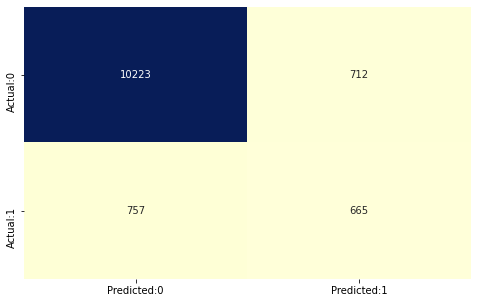

In [20]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

plt.figure(figsize = (8,5))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [21]:

TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]                                                           

In [22]:
# Accuracy measures by classification_report()
result = classification_report(y_test,y_pred)

print(result)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10935
           1       0.48      0.47      0.48      1422

    accuracy                           0.88     12357
   macro avg       0.71      0.70      0.70     12357
weighted avg       0.88      0.88      0.88     12357



In [23]:
# Compute kappa value
kappa = metrics.cohen_kappa_score(y_test, y_pred)

print('kappa value:',kappa)

kappa value: 0.408157528327604


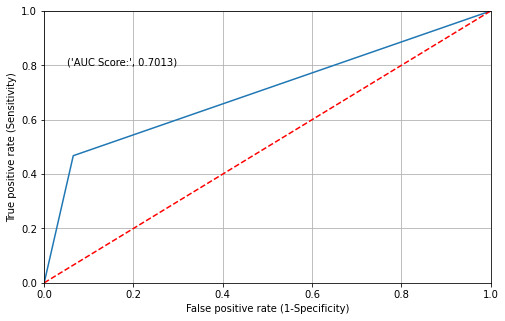

In [24]:
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr,tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))

plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

plt.grid(True)

In [25]:

cols = ['Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score','f1-score']

result_tabulation = pd.DataFrame(columns = cols)

SVM_linear_metrics = pd.Series({'Model': "SVM using linear kernel ",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                  'f1-score':metrics.f1_score(y_test, y_pred)})



result_tabulation = result_tabulation.append(SVM_linear_metrics , ignore_index = True)


result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,SVM using linear kernel,0.701270,0.482934,0.467651,0.881120,0.408158,0.475170


# SVM using polynomial degree 2 kernal

In [26]:
# Build the model
svclassifier_Poly = SVC(kernel='poly', degree = 2, gamma = 'auto')
# Fit the model
svclassifier_Poly.fit(X_train, y_train)

SVC(degree=2, gamma='auto', kernel='poly')

In [27]:
# Predict the values
y_pred_Poly_d  = svclassifier_Poly.predict(X_test)

Before we compute the accuracy measures, let us plot the confusion matrix.

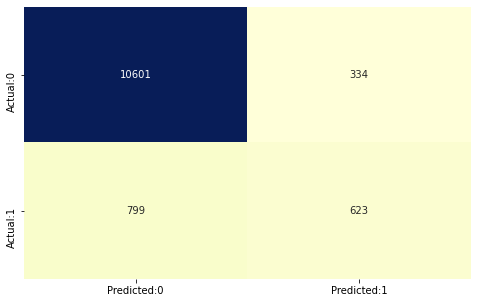

In [28]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_Poly_d)

conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

plt.figure(figsize = (8,5))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [29]:
TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1] 

In [30]:
# Accuracy measures by classification_report()
result = classification_report(y_test, y_pred_Poly_d)

print(result)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10935
           1       0.65      0.44      0.52      1422

    accuracy                           0.91     12357
   macro avg       0.79      0.70      0.74     12357
weighted avg       0.90      0.91      0.90     12357



In [31]:
# Compute kappa value
kappa = metrics.cohen_kappa_score(y_test, y_pred_Poly_d)

print('kappa value:',kappa)

kappa value: 0.4751576862671667


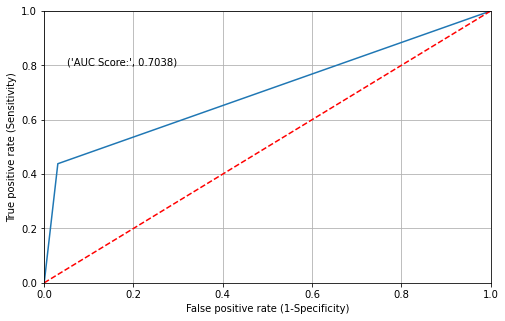

In [32]:
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_Poly_d)

plt.plot(fpr,tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_Poly_d),4)))

plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

plt.grid(True)

In [33]:
SVM_polynomial_d_metrics = pd.Series({'Model': "SVM using polynomial degree 2 kernal ",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_Poly_d),
                 'Precision Score': metrics.precision_score(y_test, y_pred_Poly_d),
                 'Recall Score': metrics.recall_score(y_test, y_pred_Poly_d),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_Poly_d),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_Poly_d),
                  'f1-score':metrics.f1_score(y_test, y_pred_Poly_d)})



result_tabulation = result_tabulation.append(SVM_polynomial_d_metrics , ignore_index = True)

result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,SVM using linear kernel,0.701270,0.482934,0.467651,0.881120,0.408158,0.475170
1,SVM using polynomial degree 2 kernal,0.703786,0.650993,0.438115,0.908311,0.475158,0.523749


# Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier

# Build the model
gnb = GaussianNB()

# Define  strategy
GNB = OneVsRestClassifier(gnb)

# Fit the model
GNB.fit(X_train, y_train)

OneVsRestClassifier(estimator=GaussianNB())

In [40]:
# Predict the values
y_pred_GNB = GNB.predict(X_test)

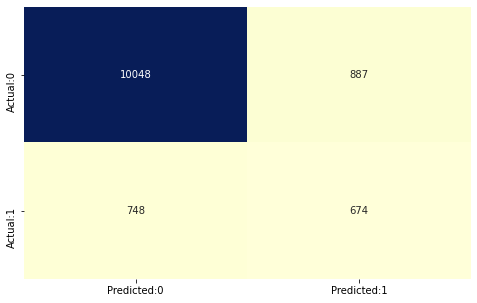

In [41]:
cm = confusion_matrix(y_test, y_pred_GNB)

conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

plt.figure(figsize = (8,5))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [42]:
# Accuracy measures by classification_report()
result = classification_report(y_test,y_pred_GNB)

print(result)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     10935
           1       0.43      0.47      0.45      1422

    accuracy                           0.87     12357
   macro avg       0.68      0.70      0.69     12357
weighted avg       0.87      0.87      0.87     12357



In [44]:
Naive_bayes = pd.Series({'Model': "Naive Bayes",
                 'AUC Score' : metrics.roc_auc_score(y_test, y_pred_GNB),
                 'Precision Score': metrics.precision_score(y_test, y_pred_GNB,average="macro"),
                 'Recall Score': metrics.recall_score(y_test, y_pred_GNB ,average="macro"),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_GNB),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_GNB),
                 'f1-score':metrics.f1_score(y_test, y_pred_GNB,average = "macro")})



result_tabulation = result_tabulation.append(Naive_bayes , ignore_index = True)

result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,SVM using linear kernel,0.701270,0.482934,0.467651,0.881120,0.408158,0.475170
1,SVM using polynomial degree 2 kernal,0.703786,0.650993,0.438115,0.908311,0.475158,0.523749
2,Naive Bayes,nan,0.681245,0.696432,0.867686,nan,0.688328
3,Naive Bayes,0.696432,0.681245,0.696432,0.867686,0.376842,0.688328


In [46]:
result_tabulation.drop(2,axis=0)

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,SVM using linear kernel,0.701270,0.482934,0.467651,0.881120,0.408158,0.475170
1,SVM using polynomial degree 2 kernal,0.703786,0.650993,0.438115,0.908311,0.475158,0.523749
3,Naive Bayes,0.696432,0.681245,0.696432,0.867686,0.376842,0.688328
